In [37]:
import os
import sys
import torch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sys.path.append(os.path.abspath(os.path.join("..")))

The follow runs are for BCE loss with varying embed dims.

In [38]:
runs = [
    "logs/train/multiruns/dims_and_lossfns/0",
    "logs/train/multiruns/dims_and_lossfns/2",
    "logs/train/multiruns/dims_and_lossfns/4",
    "logs/train/multiruns/dims_and_lossfns/6",
]

In [39]:
run_metrics = [f"D:\\felix-ml\\{run}\\csv\\version_0\\metrics.csv" for run in runs]
dfs = [pd.read_csv(metrics) for metrics in run_metrics]

In [40]:
dfms = []

for df in dfs:
    df2 = df[~df["epoch"].isna()]
    df2 = df2.drop(["step", "train/loss_step"], axis=1)
    dfm = df2.melt("epoch", var_name="cols", value_name="loss")
    dfm = dfm[~dfm["loss"].isna()]
    dfms.append(dfm)

run_dims = []

for i in range(len(runs)):
    with open(f"D:\\felix-ml\\{runs[i]}\\config_tree.log", "r") as f:
        for line in f:
            if "embed_dim" in line:
                embed_dim = line[line.find(":") + 1 : -1]
                run_dims.append(embed_dim.strip())

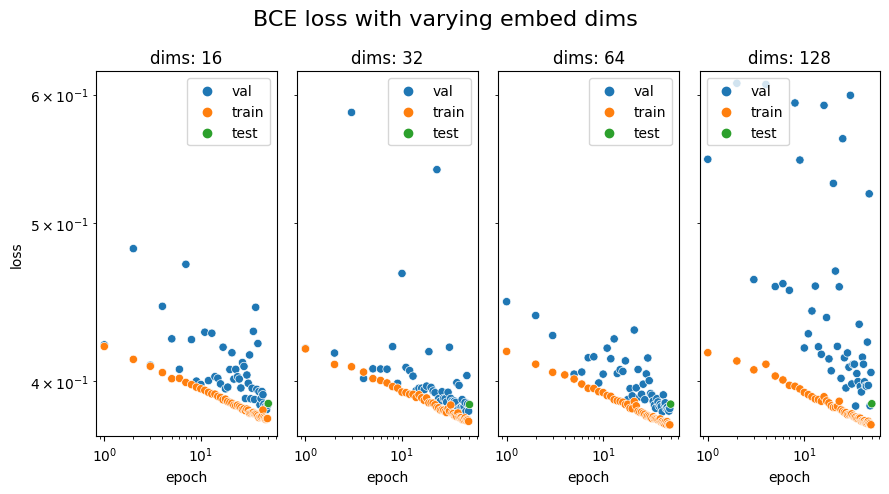

In [47]:
fig, axs = plt.subplots(1, len(runs), figsize=(9, 5), sharey=True)
fig.suptitle("BCE loss with varying embed dims", fontsize=16)
gs = []

for i, ax in enumerate(axs):
    g = sns.scatterplot(data=dfms[i], x="epoch", y="loss", hue="cols", ax=ax)
    gs.append(g)
    ax.set_title(f"dims: {run_dims[i]}")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylim([0.37, 0.62])

for g in gs:
    handles, labels = g.get_legend_handles_labels()
    for i in range(len(labels)):
        labels[i] = labels[i][: labels[i].find("/")]
    g.legend(handles=handles, labels=labels)

plt.tight_layout()
plt.show()